#### Avaliação dos melhores algoritmos de Machine Learnig

Os algoritmos de Machine Learning abaixo foram avaliados inicialmente considerando apenas a acurácia. Por se tratar de um problema de classificação binária, estando as classes balanceadas, os resultados foram adequados. 

1. Regressão Logística
2. Naive Bayes Gaussiano
3. Naive Bayes Multinomial
4. Random Forest
5. Support Vector Machine

#### Enriquecimento da análise

Com o próposito de enriquecer e tornar mais robusta a análise, serão realizadas as seguintes métricas:

1. Curva ROC
2. Matriz de Confusão
3. Precisão
4. Recall

Imports necessários

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sys
sys.path.append('/home/guilherme/AIEnvironment/SentimentAnalysis/src/data_preparation')
sys.path.append('/home/guilherme/AIEnvironment/SentimentAnalysis/src/modeling')
from data_exploration import load_data
from ml_metrics import get_roc_curve_pr

#### Carregando dataset dos textos tratados após ténicas de NLP


In [2]:
df = load_data('/home/guilherme/AIEnvironment/SentimentAnalysis/data/processed/df_imdb_treated.csv')
df.head()

,Reviews,Sentiment,Treatment1,Treatment2,Treatment3,Treatment4
0,Once again Mr. Costner has dragged out a movie...,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...,mr costner dragged movie far longer necessary ...,mr costner drag movi far longer necessari asid...
1,This is an example of why the majority of acti...,0,This example majority action films same. Gener...,This example majority action films Generic bor...,example majority action films generic boring t...,exampl major action film gener bore there real...
2,"First of all I hate those moronic rappers, who...",0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...,first hate moronic rappers couldnt act gun pre...,first hate moron rapper couldnt act gun press ...
3,Not even the Beatles could write songs everyon...,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...,even beatles could write songs everyone liked ...,even beatl could write song everyon like altho...
4,Brass pictures movies is not a fitting word fo...,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...,brass pictures movies fitting word really some...,brass pictur movi fit word realli somewhat bra...


#### Obtendo parâmetros para curva ROC - modelo de Regressão Logística
----------------------------------------------------------------------

In [3]:
lg_test_y, lg_predict, lg_predict_proba = get_roc_curve_pr(df, 'Treatment4', 'Sentiment', LogisticRegression())

#### Obtendo parâmetros para curva ROC - modelo de Naive Bayes Gaussiano
-------------------------------------------------------------------------

In [7]:
nvg_test_y, nvg_predict, nvg_predict_proba = get_roc_curve_pr(df, 'Treatment4', 'Sentiment', GaussianNB())

#### Obtendo parâmetros para curva ROC - modelo de Naive Bayes Multinomial
---------------------------------------------------------------------------

In [9]:
nvm_test_y, nvm_predict, nvm_predict_proba = get_roc_curve_pr(df, 'Treatment4', 'Sentiment', MultinomialNB())

#### Obtendo parâmetros para curva ROC - modelo de Random Forest
-----------------------------------------------------------------

In [11]:
rf_test_y, rf_predict, rf_predict_proba = get_roc_curve_pr(df, 'Treatment4', 'Sentiment', RandomForestClassifier())

#### Obtendo parâmetros para curva ROC - modelo de Support Vector Machine
-------------------------------------------------------------------------

In [15]:
svm_test_y, svm_predict, svm_predict_proba = get_roc_curve_pr(df, 'Treatment4', 'Sentiment', SVC(probability=True))

#### Obtendo curvas ROC para os modelos de Machine Learning 

Imports necessários

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
params_roc_curve = [(lg_test_y, lg_predict_proba), (nvg_test_y, nvg_predict_proba),
                    (nvm_test_y, nvm_predict_proba), (rf_test_y, rf_predict_proba),
                    (svm_test_y, svm_predict_proba)]
labels = ['Regressão Logística', 'Naive Bayes Gaussiano',
          'Naive Bayes Multinomial', 'Random Forest', 'SVM']
colors = ['orange', 'red', 'blue', 'magenta', 'green']


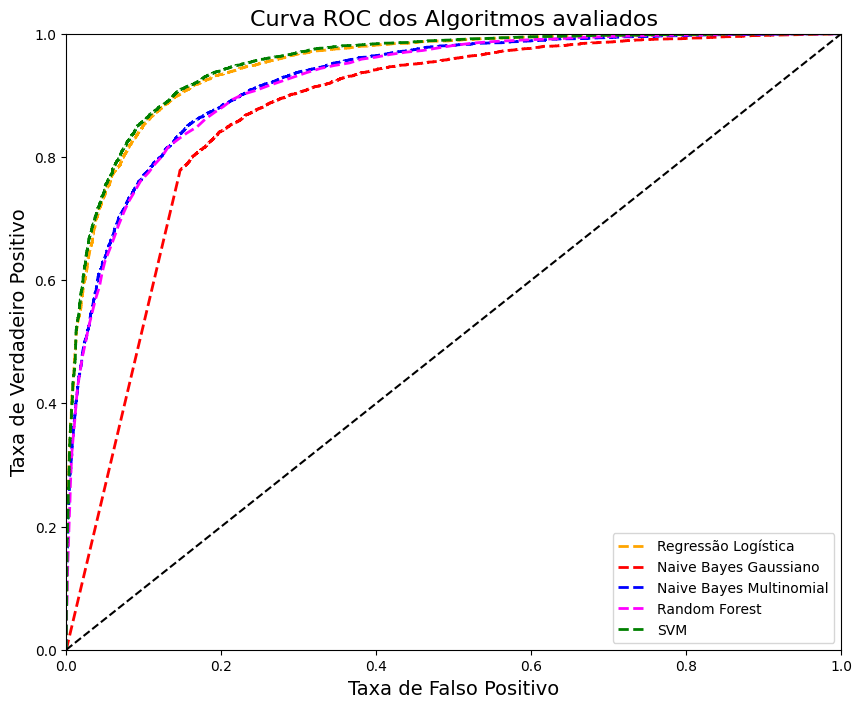

In [48]:
fig = plt.figure(figsize=(10, 8))
plt.title('Curva ROC dos Algoritmos avaliados', fontsize=16)
for i in range(5):
    test_y, predict_proba = params_roc_curve[i]
    fpt, tpr, _ = roc_curve(test_y, predict_proba[:, 1], pos_label=1)
    plt.plot(fpt, tpr, label=labels[i], color = colors[i], linestyle='--', linewidth=2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falso Positivo', fontsize=14)
plt.ylabel('Taxa de Verdadeiro Positivo', fontsize=14)
plt.savefig('/home/guilherme/AIEnvironment/SentimentAnalysis/reports/figures/roc_curve.png')
plt.show()

    